<a href="https://colab.research.google.com/github/Anshuman-37/MLIS_Project_Ideal/blob/main/MLIS_ideal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Getting the text
### [Click here to get it from kaggle](https://www.kaggle.com/ninjacoding/breast-cancer-wisconsin-benign-or-malignant?select=tumor.csv)
### [Click here to go to the main archive of uci](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29)
##### I am using the kaggle one I don't know how to use the other one.

In [19]:
import pandas as pd
df = pd.read_csv('/content/tumor.csv')
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [20]:
df.head()
df[0:10]

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


# EDA for the data 

##Check for the nan values 

In [21]:
# checking all the data for any null values
print(df.isnull().values.any())

## I think there is no nan values in the data they probably removed them
## Still this data is in the kaggle please check from the main directoryu


## Checking column wise
ctr = 1
print('Checking for nan values column wise')
for key, value in df.iteritems():
    print('column number',ctr,df[key].isnull().values.any())
    ctr += 1 

False
Checking for nan values column wise
column number 1 False
column number 2 False
column number 3 False
column number 4 False
column number 5 False
column number 6 False
column number 7 False
column number 8 False
column number 9 False
column number 10 False
column number 11 False


## Ploting the correlation matrix

In [22]:
# Not making much sense 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# corr = df.corr()
# plt.figure(figsize=(18,18))
# sns.heatmap(corr, cmap='coolwarm', annot = True)
# plt.show()

## We will use this one for the end code
## https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
Clump Thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


<Figure size 720x720 with 0 Axes>

## Ploting Hist of the data distribution

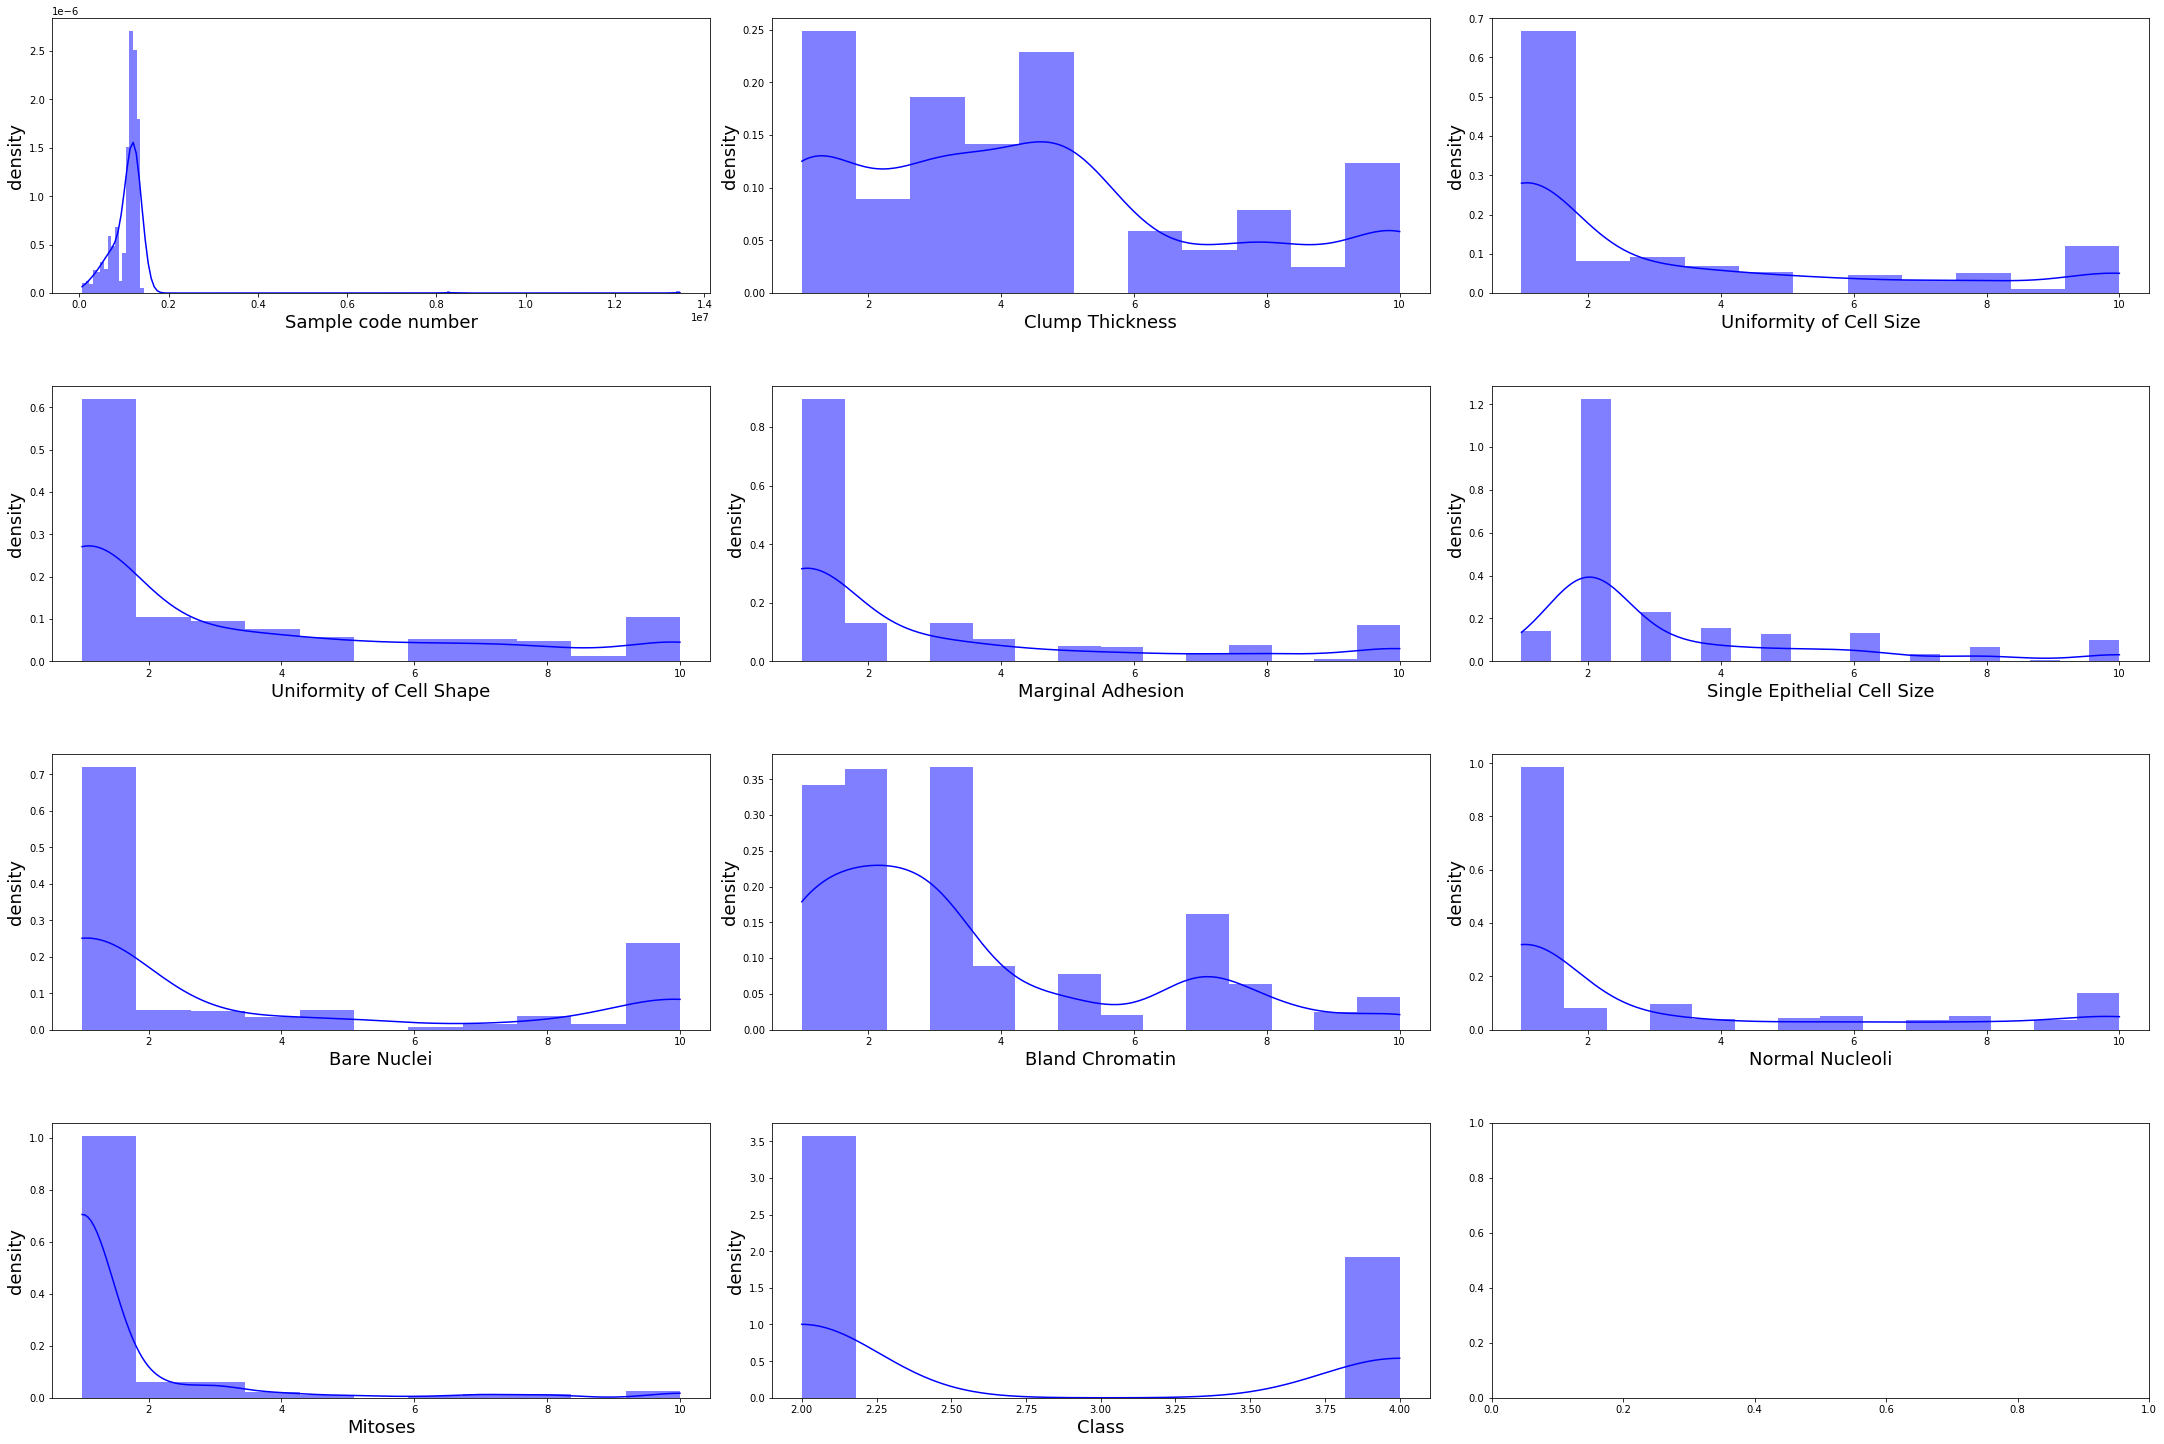

In [23]:
# create hist and kde plots to observe the data distribution
fig, ax = plt.subplots(ncols=3, nrows=4, figsize=(30,20))
index = 0
ax = ax.flatten()

for col, value in df.items():
    col_dist = sns.histplot(value, ax=ax[index], color="blue", label="100% Equities", kde=True, stat="density", linewidth=0)
    col_dist.set_xlabel(col,fontsize=18)
    col_dist.set_ylabel('density',fontsize=18)
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


# Fitting on the data

## Data Preprocessing 

In [24]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
y=df['Class'].values
print('Unique labels in y',np.unique(y))
labelencoder=LabelEncoder()
Y=labelencoder.fit_transform(y)
x=df.drop(labels=['Class','Sample code number'],axis=1)
print(x.describe().T)

Unique labels in y [2 4]
                             count      mean       std  ...  50%  75%   max
Clump Thickness              683.0  4.442167  2.820761  ...  4.0  6.0  10.0
Uniformity of Cell Size      683.0  3.150805  3.065145  ...  1.0  5.0  10.0
Uniformity of Cell Shape     683.0  3.215227  2.988581  ...  1.0  5.0  10.0
Marginal Adhesion            683.0  2.830161  2.864562  ...  1.0  4.0  10.0
Single Epithelial Cell Size  683.0  3.234261  2.223085  ...  2.0  4.0  10.0
Bare Nuclei                  683.0  3.544656  3.643857  ...  1.0  6.0  10.0
Bland Chromatin              683.0  3.445095  2.449697  ...  3.0  5.0  10.0
Normal Nucleoli              683.0  2.869693  3.052666  ...  1.0  4.0  10.0
Mitoses                      683.0  1.603221  1.732674  ...  1.0  1.0  10.0

[9 rows x 8 columns]


## Test train split

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Feature Scaling
print(x_train[0:5])

     Clump Thickness  Uniformity of Cell Size  ...  Normal Nucleoli  Mitoses
437                3                        1  ...                1        1
256                7                        9  ...                3        3
584                5                        2  ...                1        1
18                10                        7  ...                1        2
350                2                        1  ...                1        1

[5 rows x 9 columns]


## Logistic Regression

                    precision    recall  f1-score   support

  Benign (Class 2)       0.94      0.99      0.96        79
Malignant(Class 4)       0.98      0.91      0.95        58

          accuracy                           0.96       137
         macro avg       0.96      0.95      0.95       137
      weighted avg       0.96      0.96      0.96       137



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


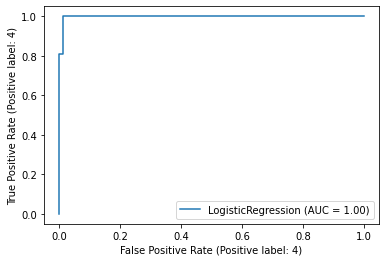

In [26]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(x_train, y_train)
prediction_lr = classifier_lr.predict(x_test)
print(classification_report(y_test, prediction_lr, 
                            target_names = ['Benign (Class 2)','Malignant(Class 4)']))
metrics.plot_roc_curve(classifier_lr, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


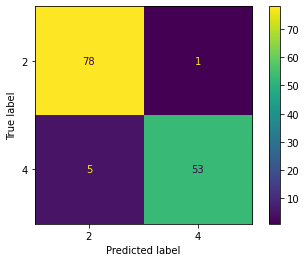

Accuracy of Logistic Regression model is 95.62043795620438


In [27]:
#plotting the confusion matrix for test set
from sklearn.metrics import plot_confusion_matrix, accuracy_score, classification_report
plot_confusion_matrix(classifier_lr,x_test,y_test)
plt.show()
#printing the accuracy for test set
print('Accuracy of Logistic Regression model is {}'.format(accuracy_score(y_test,prediction_lr)*100))

## Decision Tree

                    precision    recall  f1-score   support

  Benign (Class 2)       0.94      0.97      0.96        79
Malignant(Class 4)       0.96      0.91      0.94        58

          accuracy                           0.95       137
         macro avg       0.95      0.94      0.95       137
      weighted avg       0.95      0.95      0.95       137



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


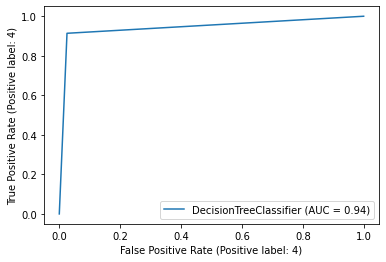

In [28]:
#training the data using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
prediction_dt = tree.predict(x_test)
print(classification_report(y_test, prediction_dt,
                            target_names = ['Benign (Class 2)','Malignant(Class 4)']))
metrics.plot_roc_curve(tree, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


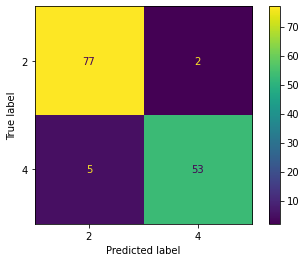

Accuracy of Decision Tree model is 94.8905109489051


In [29]:
#plotting the confusion matrix for test set
from sklearn.metrics import confusion_matrix
plot_confusion_matrix(tree,x_test,y_test)
plt.show()
print('Accuracy of Decision Tree model is {}'.format(accuracy_score(y_test,prediction_dt)*100))

## Random Forest

                    precision    recall  f1-score   support

  Benign (Class 2)       0.93      0.99      0.96        79
Malignant(Class 4)       0.98      0.90      0.94        58

          accuracy                           0.95       137
         macro avg       0.95      0.94      0.95       137
      weighted avg       0.95      0.95      0.95       137



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


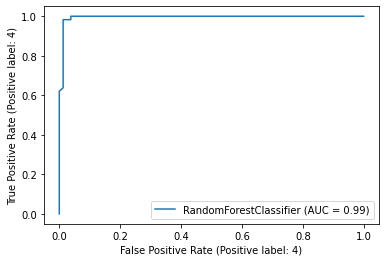

In [30]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
prediction_rf = forest.predict(x_test)
print(classification_report(y_test, prediction_rf,
                            target_names = ['Benign (Class 2)','Malignant(Class 4)']))
metrics.plot_roc_curve(forest, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


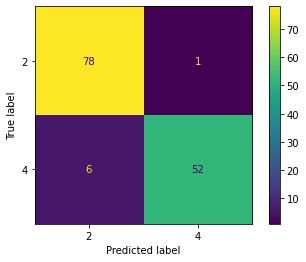

Accuracy of Random Forest model is 94.8905109489051


In [31]:
plot_confusion_matrix(forest,x_test,y_test)
plt.show()
#printing the accuracy for test set
print('Accuracy of Random Forest model is {}'.format(accuracy_score(y_test,prediction_rf)*100))

## XGBOOST

                    precision    recall  f1-score   support

  Benign (Class 2)       0.95      0.99      0.97        79
Malignant(Class 4)       0.98      0.93      0.96        58

          accuracy                           0.96       137
         macro avg       0.97      0.96      0.96       137
      weighted avg       0.96      0.96      0.96       137



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


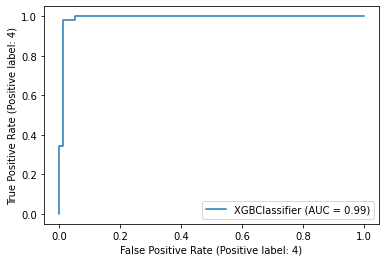

In [32]:
import xgboost
xgb = xgboost.XGBClassifier(earning_rate=0.009, n_estimators=350, subsample=0.8, max_depth=7)
xgb.fit(x_train,y_train)
prediction_xgb = xgb.predict(x_test)
print(classification_report(y_test, prediction_xgb, 
                            target_names = ['Benign (Class 2)','Malignant(Class 4)']))
metrics.plot_roc_curve(xgb, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


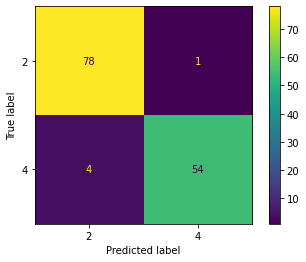

Accuracy of XGB model is 96.35036496350365


In [33]:
#plotting the confusion matrix for test set
plot_confusion_matrix(xgb,x_test,y_test)
plt.show()
#printing the accuracy for test set
print('Accuracy of XGB model is {}'.format(accuracy_score(y_test,prediction_xgb)*100))

## SVM

                    precision    recall  f1-score   support

  Benign (Class 2)       0.95      0.99      0.97        79
Malignant(Class 4)       0.98      0.93      0.96        58

          accuracy                           0.96       137
         macro avg       0.97      0.96      0.96       137
      weighted avg       0.96      0.96      0.96       137



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


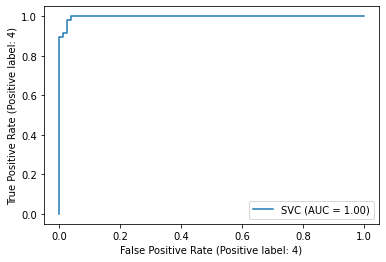

In [34]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state = 1)
svm.fit(x_train,y_train)
prediction_svm = svm.predict(x_test)
print(classification_report(y_test, prediction_xgb, 
                            target_names = ['Benign (Class 2)','Malignant(Class 4)']))
metrics.plot_roc_curve(svm, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


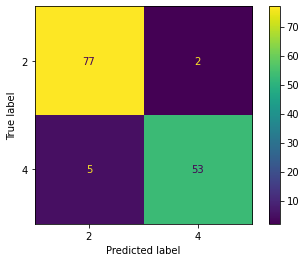

Accuracy of SVM model is 94.8905109489051


In [35]:
#plotting the confusion matrix for test set
plot_confusion_matrix(svm,x_test,y_test)
plt.show()
#printing the accuracy for test set
print('Accuracy of SVM model is {}'.format(accuracy_score(y_test,prediction_svm)*100))

# Conclusion with Accuracies in one place

In [36]:
print('Accuracy of Logistic Regression model is {}'.format(accuracy_score(y_test,prediction_lr)*100))
print('Accuracy of Decision Tree model is {}'.format(accuracy_score(y_test,prediction_dt)*100))
print('Accuracy of Random Forest model is {}'.format(accuracy_score(y_test,prediction_rf)*100))
print('Accuracy of XGB model is {}'.format(accuracy_score(y_test,prediction_xgb)*100))
print('Accuracy of SVM model is {}'.format(accuracy_score(y_test,prediction_svm)*100))

Accuracy of Logistic Regression model is 95.62043795620438
Accuracy of Decision Tree model is 94.8905109489051
Accuracy of Random Forest model is 94.8905109489051
Accuracy of XGB model is 96.35036496350365
Accuracy of SVM model is 94.8905109489051
